In [1]:
from __future__ import division, print_function

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from scipy.io import loadmat
from sklearn.externals import joblib
from Functions.DataHandler import LofarDataset
from Functions.SonarFunctions.read_raw_data import AudioData
from Functions.FunctionsDataVisualization import plotSpectrogram
from Functions.SonarFunctions.lofar_analysis import LofarAnalysis, tpsw

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.titleweight'] = 'bold'
plt.rc('legend', **{'fontsize': 15})
plt.rc('font', weight='bold')
sns.set_color_codes()

datapath = os.getenv('OUTPUTDATAPATH')
audiodatapath = os.getenv('INPUTDATAPATH')
results_path = os.getenv('PACKAGE_NAME')
database = '4classes'

decimation_rate=[1,3]
n_pts_fft_list=[pow(2,i) for i in range(7,14)]
n_overlap_list = [0, .5]
spectrum_bins_left=[52, 103, 205, 400, 820, 1630, 3270]

In [2]:
lofar = LofarDataset(datapath)
window=1024; overlap=0; decimation_rate=0; spectrum_bins_left=400
X, y, class_labels = lofar.loadData(database, window, overlap, decimation_rate, spectrum_bins_left)
ad = AudioData(audiodatapath, database)
raw_data,fs = ad.read_raw_data(verbose=0)

%matplotlib inline
n_fft = 1024
raw_data,fs = ad.read_raw_data(verbose=0)
raw_data_seg = raw_data.copy()
hist_dict = dict()
bins = np.linspace(-1,1,80)
for cls in raw_data:
    hist_dict[cls] = dict()
    for run_name, run in raw_data[cls].items():
        
        
        seg_run = np.zeros((run.shape[0]//window, window))
        
        hist_dict[cls][run_name] = dict()
        hist_dict[cls][run_name]['height'] = np.zeros((seg_run.shape[0], bins.shape[0]-1))
        hist_dict[cls][run_name]['center'] = np.zeros((seg_run.shape[0], bins.shape[0]-1))
        hist_dict[cls][run_name]['index'] = np.zeros(seg_run.shape[0])
        for i in range(seg_run.shape[0]):
#             begin = i*(window_size - overlap)
#             end = i*(window_size - overlap) + window_size
#             end = (i+1)*n_fft
            seg_run[i,:] = run[i*n_fft:(i+1)*(n_fft)]
            m_height,bins_edges = np.histogram(seg_run[i,:],bins=bins, 
                                               normed=True, density=True)
            bins_diff = np.diff(bins_edges)
            bins_centers = bins_edges[:-1] + bins_diff/2
            
            hist_dict[cls][run_name]['height'][i, :] = m_height
            hist_dict[cls][run_name]['center'][i, :] = bins_centers
            hist_dict[cls][run_name]['index'][i] = i
#         hist_dict[cls][run_name]['height'] = np.vstack(hist_dict[cls][run_name]['height'])
#         hist_dict[cls][run_name]['center'] = np.vstack(hist_dict[cls][run_name]['center'])
        raw_data_seg[cls][run_name] = seg_run
hist_test = hist_dict['ClassA']['navio10.wav']
pdf_dict = {'ClassA':[], 'ClassB':[], 'ClassC':[], 'ClassD':[]}
for cls in pdf_dict:
    pdf_dict[cls] = pd.DataFrame(np.concatenate([hist_dict[cls][run]['height'] 
                                                 for run in hist_dict[cls].keys()], axis=0).transpose(),
                                 index=bins[:-1] + np.diff(bins)/2)


/home/pedrolisboa/.virtualenvs/.virtualenvs/lps/local/lib/python2.7/site-packages/scipy/io/wavfile.py:267: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)
/home/pedrolisboa/.virtualenvs/.virtualenvs/lps/local/lib/python2.7/site-packages/scipy/io/wavfile.py:267: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)
/home/pedrolisboa/.virtualenvs/.virtualenvs/lps/local/lib/python2.7/site-packages/scipy/io/wavfile.py:267: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)
/home/pedrolisboa/.virtualenvs/.virtualenvs/lps/local/lib/python2.7/site-packages/scipy/io/wavfile.py:267: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


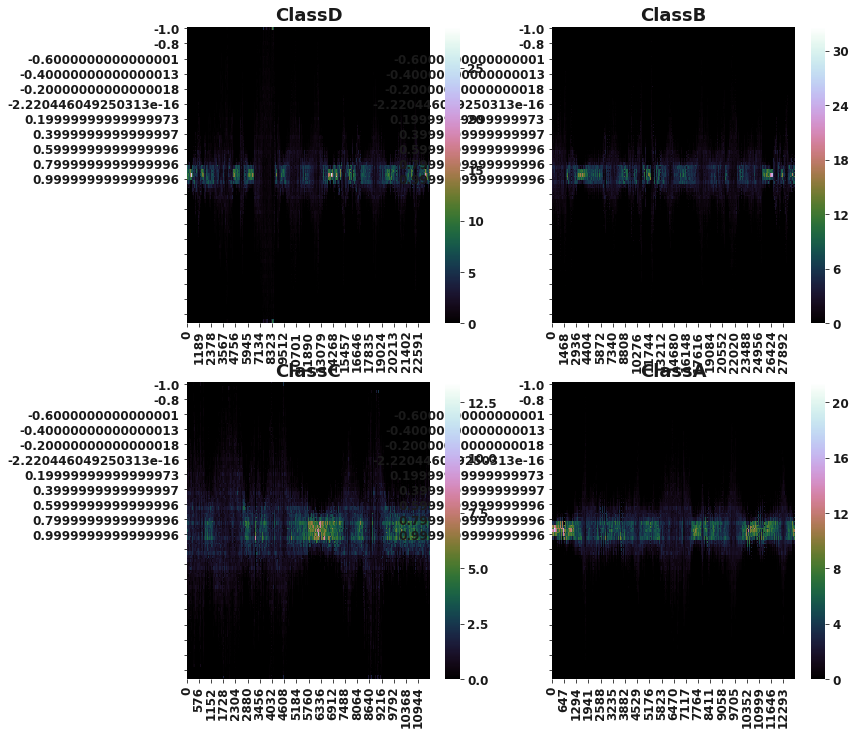

In [3]:
fig, axes = plt.subplots(figsize=(12,12), ncols=2, nrows=2)
for cls,ax in zip(pdf_dict.keys(), axes.flatten()):
    ax_step = 1000*int((pdf_dict[cls].shape[1]//5)/1000)
    sns.heatmap(pdf_dict[cls], ax=ax, cmap='cubehelix', 
#                 xticklabels=range(0,pdf_dict[cls].shape[1],ax_step),
#                 yticklabels=np.arange(-1,1.2,0.2))
#                 xticklabels=True,
#                 yticklabels=True)  
                )
    ax.set_yticklabels(np.arange(-1,1.1,0.2))
    ax.set_title(cls)
#     ax.set_xticklabels(range(0,pdf_dict[cls].shape[1],ax_step))
#     print(pdf_dict[cls].shape)

In [4]:
ad = AudioData(audiodatapath, database)
raw_data,fs = ad.read_raw_data(verbose=1)

def window_gen_wrapper(x, window_size, overlap, fn, **kwargs):
    for i in range(power.shape[0]):
        begin = i*(window_size - overlap)
        end = i*(window_size - overlap) + window_size
        end = (i+1)*n_fft
        buffer = x[i*n_fft:(i+1)*(n_fft)]

        spec = fn(buffer, n=n_fft, axis=0)
        power[i] = np.absolute(spec)

Reading Raw data in 4classes database

Reading ClassA
Reading ClassB
Reading ClassC
Reading ClassD


/home/pedrolisboa/.virtualenvs/.virtualenvs/lps/local/lib/python2.7/site-packages/scipy/io/wavfile.py:267: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)
/home/pedrolisboa/.virtualenvs/.virtualenvs/lps/local/lib/python2.7/site-packages/scipy/io/wavfile.py:267: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [5]:
from sklearn.neighbors import KernelDensity
from Functions.StatisticalAnalysis import EstPDF

from scipy.stats import entropy
import time
kernel = 'gaussian'
bins = np.linspace(-1,1,200)
start = time.time()
analysis_step=1
if os.path.exists('./kde.jbl'):
    kdes = joblib.load('./kde.jbl')
else:
    kdes = dict()
    for cls in raw_data_seg:
        kdes[cls] = dict()
        for run_name, run_seg in raw_data_seg[cls].items():
            kdes[cls][run_name] = np.zeros((run_seg.shape[0], bins.shape[0]))
    #         begin = i*(window_size - overlap)
    #         end = i*(window_size - overlap) + window_size
    #         end = (i+1)*n_fft
    #         buffer = x[i*n_fft:(i+1)*(n_fft)]
            for i in range(0, run_seg.shape[0], analysis_step):
                segment = run_seg[i]
                kde = KernelDensity(kernel=kernel, 
                                     bandwidth=0.5).fit(segment[:, np.newaxis])
                kdes[cls][run_name][i] = np.exp(kde.score_samples(bins[:, np.newaxis]))
    print(time.time() - start)
    joblib.dump(kdes, 'kde.jbl')

In [6]:
from Functions.StatFunctions import KLDiv
kl_foward = {}
kl_reverse = {}
analysis_step = 50
k=50


start = time.time()
for cls in kdes:
    inner_start = time.time()
    kl_foward[cls] = dict()
    kl_reverse[cls] = dict()
    for run in kdes[cls]:
        run_pdf = kdes[cls][run]
        kl_foward[cls][run] = np.zeros(run_pdf.shape[0] - 1)
        kl_reverse[cls][run] = np.zeros(run_pdf.shape[0] - 1)
        for i in range(k,kl_foward[cls][run].shape[0], analysis_step):
            kl_foward[cls][run][i-k] = np.absolute(KLDiv(run_pdf[i-k], run_pdf[i])[0] )
            kl_reverse[cls][run][i-k] = np.absolute(KLDiv(run_pdf[i], run_pdf[i-k])[0])
    print(time.time() - inner_start)
print(time.time() - start)

2.12520313263
2.38138103485
0.889502048492
1.03930211067
6.43696093559


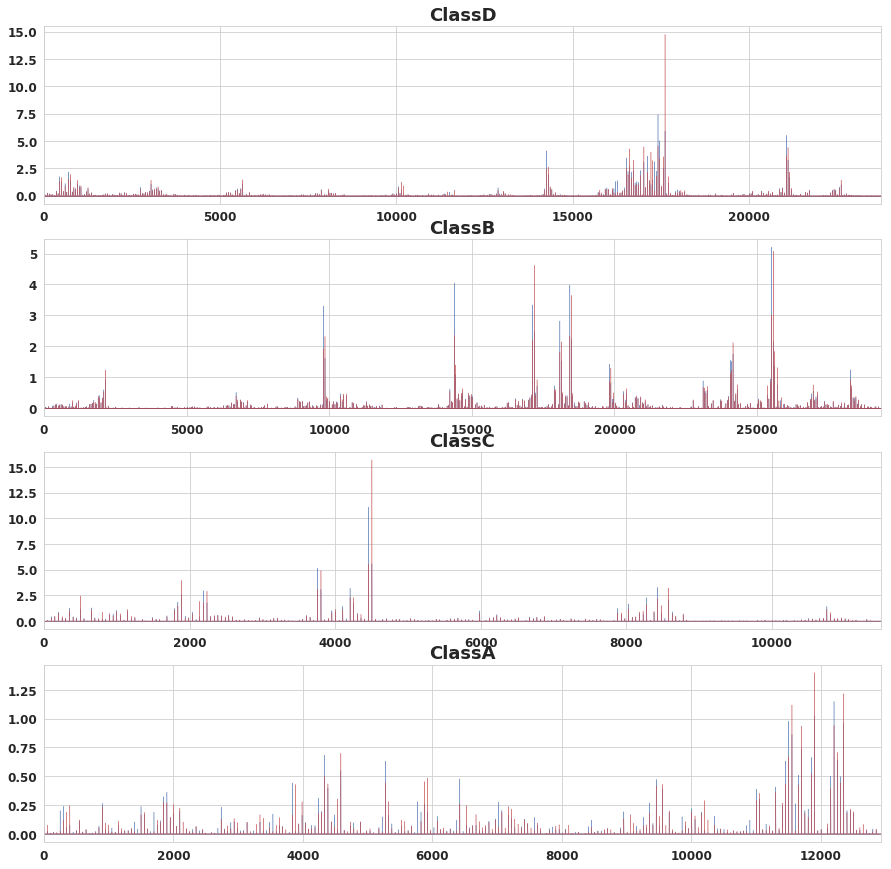

In [7]:
%matplotlib inline
sns.set_style('whitegrid')
sns.set_color_codes()
fig, axes = plt.subplots(figsize=(15,15), ncols=1, nrows=4)
for cls, ax in zip(kl_foward.keys(), axes.flatten()):
    kldiv_foward = np.concatenate([kl_foward[cls][run] 
                                   for run in np.sort(kl_foward[cls].keys())])
    kldiv_reverse = np.concatenate([kl_reverse[cls][run] 
                                    for run in np.sort(kl_reverse[cls].keys())])
#     kldiv_foward = np.where(kldiv_foward != 0, kldiv_foward, np.nan)
#     kldiv_reverse = np.where(kldiv_reverse != 0, kldiv_reverse, np.nan)
    
    ax.plot(range(kldiv_foward.shape[0]),kldiv_foward,
             color='b',marker='o',label='KL (direct)', markersize=0.01, linewidth=0.35);
    ax.plot(range(kldiv_reverse.shape[0]),kldiv_reverse,
             color='r',marker='o',label='KL (reverse)', markersize=0.01, linewidth=0.35);
    #ax.set_ylim(0,1)
    ax.set_xlim(0, kldiv_foward.shape[0]-1)
    ax.set_title(cls)
# ax.bar(range(kldiv_foward.shape[0]),kldiv_foward,
#          color='b',label='KL (direct)')#, markersize=0.01, linewidth=1.05, ax=ax);
# ax.bar(range(kldiv_reverse.shape[0]),kldiv_reverse,
#          color='r',label='KL (reverse)')#, markersize=0.01, linewidth=1.05, ax=ax);

In [8]:
from Functions.StatFunctions import KLDiv
def kl_dv_fn(kdes, k):
    kl_foward = {}
    kl_reverse = {}
    start = time.time()
    for cls in kdes:
        inner_start = time.time()
        kl_foward[cls] = dict()
        kl_reverse[cls] = dict()
        for run in kdes[cls]:
            run_pdf = kdes[cls][run]
            kl_foward[cls][run] = np.zeros(run_pdf.shape[0] - 1)
            kl_reverse[cls][run] = np.zeros(run_pdf.shape[0] - 1)
            for i in range(k,kl_foward[cls][run].shape[0]):
                kl_foward[cls][run][i-k] = np.absolute(KLDiv(run_pdf[i-k], run_pdf[i])[0] )
                kl_reverse[cls][run][i-k] = np.absolute(KLDiv(run_pdf[i], run_pdf[i-k])[0])
        print(time.time() - inner_start)
    print(time.time() - start)
    
    kldiv_foward = dict()
    kldiv_reverse = dict()
    for cls in kdes:
        
        kldiv_foward[cls] = np.concatenate([kl_foward[cls][run] 
                                       for run in np.sort(kl_foward[cls].keys())])
        kldiv_reverse[cls] = np.concatenate([kl_reverse[cls][run] 
                                        for run in np.sort(kl_reverse[cls].keys())])
    
    return kldiv_foward, kldiv_reverse

NameError: name 'k_fow' is not defined

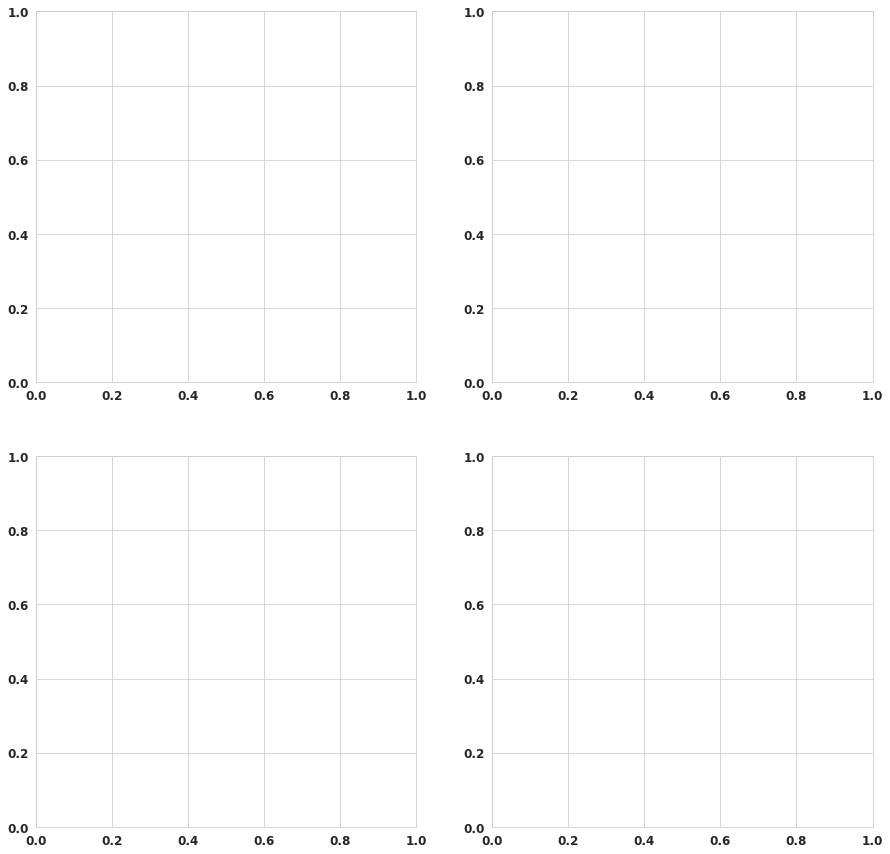

In [9]:

%matplotlib inline
# k_fow, k_rev = kl_dv_fn(kdes, 50)
sns.set_style('whitegrid')
sns.set_color_codes()
fig, axes = plt.subplots(figsize=(15,15), ncols=2, nrows=2)
for cls, ax in zip(k_fow.keys(), axes.flatten()):
    kldiv_foward = k_fow[cls]
    kldiv_reverse = k_rev[cls]
    kl_foward = np.zeros_like(kldiv_foward)
    kl_foward[::49] = kldiv_foward[::49]
    kl_reverse = np.zeros_like(kldiv_reverse)
    kl_reverse[::49] = kldiv_reverse[::49]
    
#     kl_foward = np.where(kl_foward != 0, kl_foward, np.nan)
#     kl_reverse = np.where(kl_reverse != 0, kl_reverse, np.nan)

    ax.plot(range(kldiv_foward.shape[0]),kl_foward,
             color='b',marker='o',label='KL (direct)', markersize=0.01, linewidth=0.35);
    ax.plot(range(kldiv_reverse.shape[0]),kl_reverse,
             color='r',marker='o',label='KL (reverse)', markersize=0.01, linewidth=0.35);
    ax.set_title(cls)
    #ax.set_ylim(0,1)
    ax.set_xlim(0, kldiv_foward.shape[0]-1)

In [ ]:
from Functions.StatFunctions import KLDiv
window_range=30

k_fow, k_rev = kl_dv_fn(kdes, 1)
kl_foward_matrices = {
    'ClassA': np.zeros((window_range, k_fow['ClassA'].shape[0])),
    'ClassB': np.zeros((window_range, k_fow['ClassB'].shape[0])),
    'ClassC': np.zeros((window_range, k_fow['ClassC'].shape[0])),
    'ClassD': np.zeros((window_range, k_fow['ClassD'].shape[0]))
}
kl_reverse_matrices = {
    'ClassA': np.zeros((window_range, k_fow['ClassA'].shape[0])),
    'ClassB': np.zeros((window_range, k_fow['ClassB'].shape[0])),
    'ClassC': np.zeros((window_range, k_fow['ClassC'].shape[0])),
    'ClassD': np.zeros((window_range, k_fow['ClassD'].shape[0]))
}

for cls in k_fow:
        kl_foward_matrices[cls][0, :] = k_fow[cls]
        kl_reverse_matrices[cls][0, :] = k_rev[cls]

for k in range(2,window_range+1):
    k_fow, k_rev = kl_dv_fn(kdes, k)
    for cls in k_fow:
        kl_foward_matrices[cls][k-1, :] = k_fow[cls]
        kl_reverse_matrices[cls][k-1, :] = k_fow[cls]

177.976907969


In [ ]:
joblib.dump(kl_foward_matrices, 'kl_foward.jbl')
joblib.dump(kl_reverse_matrices, 'kl_foward.jbl')

In [150]:
from scipy.stats import w
def kl_dv_fn(kdes, k):
    kl_foward = {}
    kl_reverse = {}
    start = time.time()
    for cls in kdes:
        inner_start = time.time()
        kl_foward[cls] = dict()
        for run in kdes[cls]:
            run_pdf = kdes[cls][run]
            kl_foward[cls][run] = np.zeros(run_pdf.shape[0] - 1)
            for i in range(k,kl_foward[cls][run].shape[0]):
                kl_foward[cls][run][i-k] = wasserstein_distance(run_pdf[i-k], run_pdf[i])
        print(time.time() - inner_start)
    print(time.time() - start)
    
    kldiv_foward = dict()
    for cls in kdes:
        
        kldiv_foward[cls] = np.concatenate([kl_foward[cls][run] 
                                       for run in np.sort(kl_foward[cls].keys())])
    
    return kldiv_foward

window_range=30

k_fow = kl_dv_fn(kdes, 1)
wss_foward_matrices = {
    'ClassA': np.zeros((window_range, k_fow['ClassA'].shape[0])),
    'ClassB': np.zeros((window_range, k_fow['ClassB'].shape[0])),
    'ClassC': np.zeros((window_range, k_fow['ClassC'].shape[0])),
    'ClassD': np.zeros((window_range, k_fow['ClassD'].shape[0]))
}

for cls in k_fow:
    kl_foward_matrices[cls][0, :] = k_fow[cls]

for k in range(2,window_range+1):
    k_fow, k_rev = kl_dv_fn(kdes, k)
    for cls in k_fow:
        kl_foward_matrices[cls][k-1, :] = k_fow[cls]
        
joblib.dump(kl_foward_matrices, 'wss_foward.jbl')

ImportError: cannot import name wasserstein_distance